# Elasticity and Maximizing Profits

This notebook is an expanded version of the analysis done here: [Price
Elasticity with
R](http://www.salemmarafi.com/code/price-elasticity-with-r)

Also you can see this page as well for a similar version: [Pricing
Analysis
Example](https://rstudio-pubs-static.s3.amazonaws.com/185880_f9e3e3ee84314609b531524dfa3f4f1b.html)

First make sure RCurl is installed (if needed) and loaded

In [ ]:
if (!require("RCurl")) install.packages("RCurl")

Loading required package: RCurl

We use the getURL function from the RCurl package to load the data from
the website. It is returned to us as a text string.

In [ ]:
url<- "http://www.salemmarafi.com/wp-content/uploads/2014/06/supermarket.csv"
textString<-getURL(url)
df<-read.csv(text=textString)

Here is the structure of the data set.

In [ ]:
str(df)

'data.frame':   30 obs. of  4 variables:
 $ Sales        : int  18 20 23 23 23 23 24 25 26 26 ...
 $ Price.Eggs   : num  4.77 4.67 4.75 4.74 4.63 4.56 4.59 4.75 4.75 4.49 ...
 $ Ad.Type      : int  0 0 0 0 0 0 0 0 1 0 ...
 $ Price.Cookies: num  4.74 4.81 4.36 4.29 4.17 4.66 4.73 4.11 4.21 4.25 ...

First we have 30 observations for demand and price for eggs. Then we
have 30 observations of the ad type that was run, where 0 means featured
the cookies poster and 1 means featured the eggs poster. Finally we have
data on the price of cookies.

Here is the data:

In [ ]:
df

   Sales Price.Eggs Ad.Type Price.Cookies
1     18       4.77       0          4.74
2     20       4.67       0          4.81
3     23       4.75       0          4.36
4     23       4.74       0          4.29
5     23       4.63       0          4.17
6     23       4.56       0          4.66
7     24       4.59       0          4.73
8     25       4.75       0          4.11
9     26       4.75       1          4.21
10    26       4.49       0          4.25
11    26       4.41       1          4.62
12    26       4.32       0          4.53
13    27       4.68       0          4.44
14    28       4.66       1          4.19
15    28       4.42       1          4.37
16    29       4.71       0          4.29
17    29       4.66       1          4.57
18    30       4.46       1          4.21
19    30       4.36       1          4.77
20    31       4.47       0          4.00
21    31       4.43       0          4.31
22    33       4.40       1          4.34
23    34       4.61       1       

Let’s start with a summary of the data:

In [ ]:
summary(df)

     Sales         Price.Eggs       Ad.Type    Price.Cookies  
 Min.   :18.00   Min.   :3.730   Min.   :0.0   Min.   :4.000  
 1st Qu.:25.25   1st Qu.:4.353   1st Qu.:0.0   1st Qu.:4.175  
 Median :28.50   Median :4.480   Median :0.5   Median :4.325  
 Mean   :30.00   Mean   :4.426   Mean   :0.5   Mean   :4.374  
 3rd Qu.:33.75   3rd Qu.:4.668   3rd Qu.:1.0   3rd Qu.:4.607  
 Max.   :46.00   Max.   :4.770   Max.   :1.0   Max.   :4.810  

The mean demand is 30 and the mean price is about \$4.4263333

Lets look at the distribution of demand.

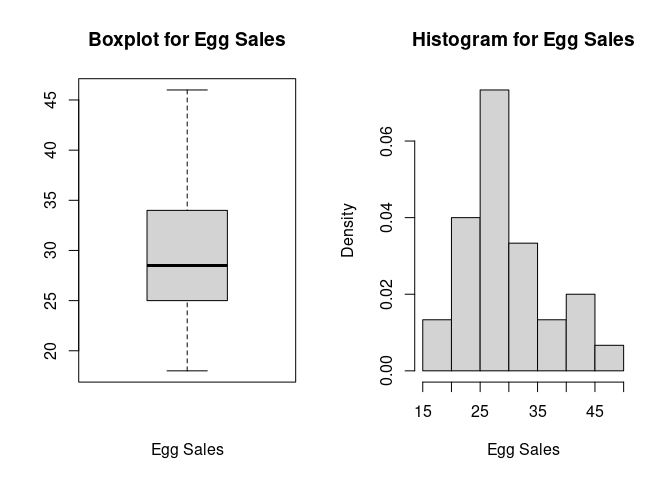

In [ ]:
par(mfrow=c(1,2))
boxplot(df$Sales,main="Boxplot for Egg Sales", xlab="Egg Sales")
hist(df$Sales,main='Histogram for Egg Sales',xlab='Egg Sales',prob=T)

There are no outliers or other unusual data to speak of here.

Lets look at the correlations between the variables.

                   Sales  Price.Eggs     Ad.Type Price.Cookies
Sales          1.0000000 -0.84958250  0.58431101   -0.37355985
Price.Eggs    -0.8495825  1.00000000 -0.39897633    0.08015516
Ad.Type        0.5843110 -0.39897633  1.00000000   -0.04108541
Price.Cookies -0.3735599  0.08015516 -0.04108541    1.00000000

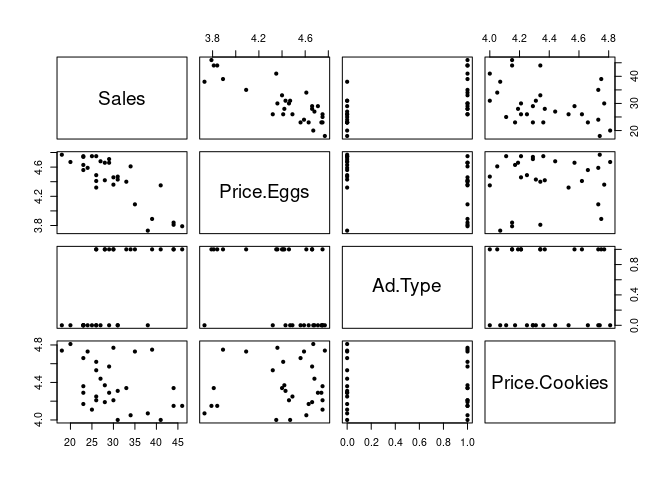

In [ ]:
cor(df)

It looks like there is a strong correlation between sales and own price.
We expected that of course.

There is a weaker correlation between egg sales and price of cookies.

Let’s model using all the predictors:

In [ ]:
model <- lm(Sales~Price.Eggs+Ad.Type+Price.Cookies, df)
summary(model)


Call:
lm(formula = Sales ~ Price.Eggs + Ad.Type + Price.Cookies, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2077 -1.9598  0.1901  1.7157  4.9172 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    137.370     10.834  12.680 1.22e-12 ***
Price.Eggs     -16.118      1.646  -9.795 3.26e-10 ***
Ad.Type          4.147      1.040   3.989 0.000481 ***
Price.Cookies   -8.711      1.901  -4.581 0.000101 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.611 on 26 degrees of freedom
Multiple R-squared:  0.8857,    Adjusted R-squared:  0.8725 
F-statistic: 67.14 on 3 and 26 DF,  p-value: 2.255e-12

[1] 137.37 -16.12   4.15  -8.71

This shows the coefficients for the various predictors.

Price of eggs, the ad type and price of cookies are all significant with
p-value less than .05.

The multiple regression equation is:

$$
    Q = 137.37  
        -16.12(P_{eggs}) + 
    4.15(AdType)  
    -8.71(P_{cookies}) 
$$

Next we show the calculation of the price elasticity: For price
elasticity we compute the percent change in quantity divided by the
percent change in price.

$$
\text{Price Elasticity} = \frac{\frac{\Delta Q}{Q}}{\frac{\Delta P_{eggs}}{P_{eggs}}}
            =(\frac{\Delta Q}{\Delta P_{eggs}})(\frac{P_{eggs}}{Q})
$$

For the first part $\frac{\Delta Q}{\Delta P_{eggs}}$, this is just the
multiple regression coefficient describing the rate of change of $Q$ as
$P_{eggs}$ changes. That is actually just the coefficient from the
multiple regression equation! So that is just $b[2] = -16.12$. For
$\frac{P_{eggs}}{Q}$, we will use the mean of the price of eggs and the
mean of sales which we saw in the summary of the data above for that.

Let’s compute the values:

In [ ]:
priceEggs <- mean(df$Price.Eggs)
priceEggs

[1] 4.426333

[1] 30

[1] -2.378416

The equation looks like this:

$$
\text{PriceElasticity} =
    \frac{ \frac{\Delta Q}{Q} }{ \frac{\Delta P_{eggs}}{P_{eggs}} } =
    \frac{\Delta Q}{\Delta P_{eggs}} \frac{P_{eggs}}{Q} =
    (-16.12)(\frac{4.43}{30}) =
    -2.38
$$

This suggests that a 1% decrease in price of eggs will increase egg
sales by 2.4%.

Next is the calculation of the Cross Price Elasticity: For cross-price
elasticity of eggs with cookies we compute the percent change in
quantity of eggs divided by the percent change in the price of cookies:

In [ ]:
PriceCookies <- mean(df$Price.Cookies)
Quantity <- mean(df$Sales)
CrossPriceElasticity <- b[4]*PriceCookies/Quantity
CrossPriceElasticity

[1] -1.269821

The equation looks like this:

$$
\text{CrossPriceElasticity} =
    \frac{ \frac{\Delta Q}{Q} }{ \frac{\Delta P_{cookies}}{P_{cookies}} } =
    \frac{\Delta Q}{\Delta P_{cookies}} \frac{P_{cookies}}{Q} =
    (-8.71)(\frac{4.37}{30}) =
    -1.27
$$

This suggests that 1% decrease in cookies price will increase the egg
sales by 1.3%, and that cookies and eggs are compliments.

For setting the optimal price we need some values for $P_{cookies}$ and
$AdType$. Suppose the current cookies price is $P_{cookies}=4.37$ and
the $AdType = 0$ for featuring the cookies. We plug these into the
multiple regression equation:

$$
    Q = 137.37  
        -16.12(P_{eggs}) + 
    4.15(0)  
    -8.71(4.37) 
$$

So the slope and intercept for the simplified demand equation we will
use is this:

In [ ]:
slope<- b[2]
slope

[1] -16.12

[1] 99.27536

So our new equation is just this:

$$   
Q  = 99.28  -16.12(P_{eggs})
$$

Suppose the unit cost of eggs is \$1.50. Then here is the profit
function:

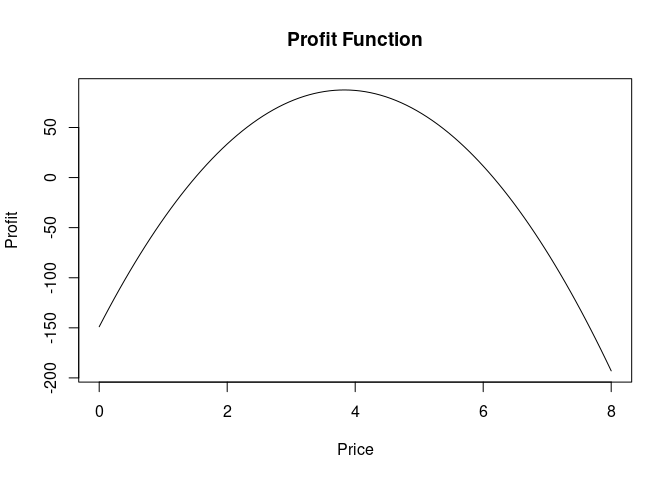

In [ ]:
profit <- function(p) {
    (p-1.50)*(intercept+slope*p)
}
curve(profit, from=0, to =8, main="Profit Function", xlab="Price", ylab="Profit")

Finally we optimize the profit function:

In [ ]:
optimize(profit, lower=0, upper=8, maximum=TRUE)

$maximum
[1] 3.829261

$objective
[1] 87.45834

The maximum profit occurs when the price is \$3.83 and the Profit is
\$87.53.

So we would advise to set the price of eggs to \$3.83.

That is where the maximum profit should occur!!